In [0]:
!pip install librosa==0.7.2

In [0]:
import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

from datetime import datetime

import os
import librosa
librosa.__version__

Using TensorFlow backend.


'0.6.3'

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
full_vocal_X = np.load('/content/drive/My Drive/SubTitle_Synchronizer/data/vocal_mfcc_numeric_data/vocal_X.npy', allow_pickle=True)
vocal_X = full_vocal_X[:4000]
vocal_y = np.full((len(vocal_X)), '1')
print('Vocal  len: ', len(vocal_X))

full_non_vocal_X = np.load('/content/drive/My Drive/SubTitle_Synchronizer/data/vocal_mfcc_numeric_data/mute_noise_X_6K_0517.npy', allow_pickle=True)
non_vocal_X = full_non_vocal_X[:4000]
non_vocal_y = np.full((len(non_vocal_X)), '0')
print('Non Vocal len: ', len(non_vocal_y))

merge_X = np.concatenate((vocal_X, non_vocal_X), axis=0)
final_y = np.concatenate((vocal_y, non_vocal_y ), axis=0)

print(len(merge_X))
print(len(final_y))

Vocal  len:  4000
Non Vocal len:  4000
8000
8000


In [0]:
features = []
for i in range(0, len(merge_X)):
    features.append(np.concatenate((merge_X[i][0], merge_X[i][1], 
                merge_X[i][2], merge_X[i][3],
                merge_X[i][4]), axis=0))
    
fianl_X = np.array(features)

In [0]:
import pickle
lb = LabelEncoder()
final_y = to_categorical(lb.fit_transform(final_y))
with open('/content/drive/My Drive/SubTitle_Synchronizer/model/LE_05132020_v1.pkl', 'wb') as fid:
    pickle.dump(lb, fid)

In [0]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(fianl_X, final_y, test_size=0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(6400, 193)
(1600, 193)


In [0]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

with open('/content/drive/My Drive/SubTitle_Synchronizer/model/SS_05182020_v1.pkl', 'wb') as fid:
    pickle.dump(ss, fid)

In [0]:
model = Sequential()

model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))  

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))    

model.add(Dense(2, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 193)               37442     
_________________________________________________________________
dropout (Dropout)            (None, 193)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

In [0]:
#early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')
history = model.fit(X_train, y_train, batch_size=256, epochs=20, 
                    validation_data=(X_test, y_test))

Epoch 1/20
25/25 [==============================] - 0s 15ms/step - loss: 0.2190 - accuracy: 0.9127 - val_loss: 0.0138 - val_accuracy: 0.9981
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.0084 - accuracy: 0.9986 - val_loss: 7.2221e-04 - val_accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 3.4714e-04 - val_accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 4.4255e-04 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 9.8820e-04 - accuracy: 0.9998 - val_loss: 2.1531e-04 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 5.4479e-04 - accuracy: 1.0000 - val_loss: 8.7683e-05 - val_accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 6.1814e-04 - accuracy: 0.9998 - val_loss: 8.4274e-05 - val_

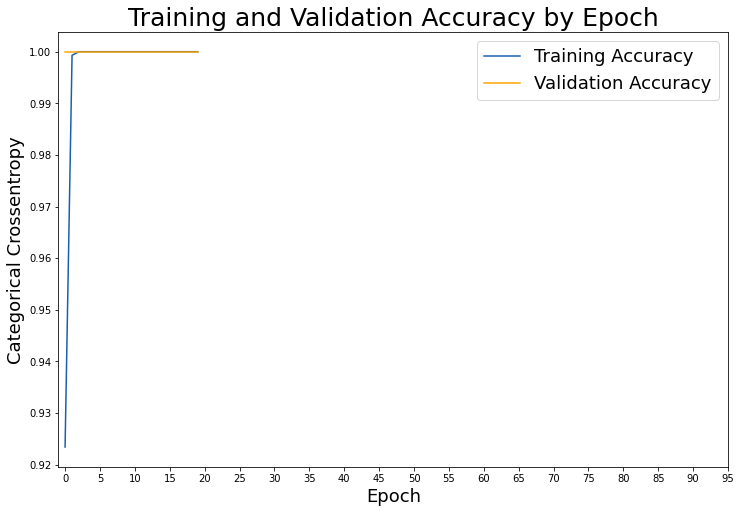

In [0]:
import matplotlib.pyplot as plt 
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18);

In [0]:
model.save("/content/drive/My Drive/SubTitle_Synchronizer/model/VocalClassification_model_05182020_v1.h5")
model.save_weights("/content/drive/My Drive/SubTitle_Synchronizer/model/VocalClassification_model_Weight_05182020_v1.h5")

In [0]:
from keras import models
model = models.load_model('/content/drive/My Drive/SubTitle_Synchronizer/model/MuteClassification_model_05142020_v1.h5')
model.load_weights('/content/drive/My Drive/SubTitle_Synchronizer/model/MuteClassification_model_Weight_05142020_v1.h5')
model.summary()

In [0]:
samples, sr = librosa.load('/content/vocals.wav', res_type='kaiser_fast')

In [0]:
def extract_features(X, sample_rate):
    
    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
        
    
    # We add also the classes of each file as a label at the end
    label = '1'

    return mfccs, chroma, mel, contrast, tonnetz, label

In [0]:
def audioClassification(audio, sr):
    #Split audio in chunks with each chunk size of 1 sec.
    split_audio_duration = 1*sr
    startIndex = 0
    features = [] 
    if len(audio) > split_audio_duration:
        iteration = int(np.ceil(len(audio)/split_audio_duration))
        for i in range(iteration):
            endIndex = startIndex + split_audio_duration
            if endIndex > len(audio):
                endIndex = len(audio)
            split_audio = audio[startIndex: endIndex]
            startIndex = endIndex + 1 
            mfccs, chroma, mel, contrast, tonnetz, label = extract_features(split_audio, sr)
            features.append([mfccs, chroma, mel, contrast, tonnetz, label])
    else:
        split_audio = audio[startIndex: len(audio)]
        mfccs, chroma, mel, contrast, tonnetz, label = extract_features(split_audio, sr)
        features.append([mfccs, chroma, mel, contrast, tonnetz])

    return features

In [0]:
garden_merge_X1 = audioClassification(samples, sr)
garden_features1 = []
for i in range(0, len(garden_merge_X1)):
    garden_features1.append(np.concatenate((garden_merge_X1[i][0], garden_merge_X1[i][1], 
                garden_merge_X1[i][2], garden_merge_X1[i][3],
                garden_merge_X1[i][4]), axis=0))
    
garden_fianl_X1 = np.array(garden_features1)

garden_fianl_X1 = ss.transform(garden_fianl_X1)
#garden_non_vocal_featuresdf = pd.DataFrame(garden_features[:25])
#garden_vocal_featuresdf = pd.DataFrame(garden_features[27:40])

preds_new_test1 = model.predict_classes(garden_fianl_X1)
preds_new_test1

In [0]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
final_y = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
classification_report = metrics.classification_report(final_y, preds_new_test1[:300])
print("Classification report: \n", classification_report)
confusion_matrix = metrics.confusion_matrix(final_y, preds_new_test1[:300])
print("Confusion matrix: \n",confusion_matrix)

print("Accuracy Score: ", accuracy_score(final_y, preds_new_test1[:300]))
print("F1 Score: ", f1_score(final_y, preds_new_test1[:300], average='weighted'))
print("Precision Score: ", precision_score(final_y, preds_new_test1[:300], average='weighted'))
print("Recall Score: ", recall_score(final_y, preds_new_test1[:300], average='weighted'))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.64      0.78        56
           1       0.92      1.00      0.96       244

    accuracy                           0.93       300
   macro avg       0.96      0.82      0.87       300
weighted avg       0.94      0.93      0.93       300

Confusion matrix: 
 [[ 36  20]
 [  0 244]]
Accuracy Score:  0.9333333333333333
F1 Score:  0.9273992924797443
Precision Score:  0.9383838383838383
Recall Score:  0.9333333333333333


In [0]:
garden_merge_X1 = audioClassification(samples, sr)
garden_features1 = []
for i in range(0, len(garden_merge_X1)):
    garden_features1.append(np.concatenate((garden_merge_X1[i][0], garden_merge_X1[i][1], 
                garden_merge_X1[i][2], garden_merge_X1[i][3],
                garden_merge_X1[i][4]), axis=0))
    
garden_fianl_X1 = np.array(garden_features1)

garden_fianl_X1 = ss.transform(garden_fianl_X1)
#garden_non_vocal_featuresdf = pd.DataFrame(garden_features[:25])
#garden_vocal_featuresdf = pd.DataFrame(garden_features[27:40])

preds_new_test1 = model.predict_classes(garden_fianl_X1)
preds_new_test1

In [0]:
garden_merge_X = audioClassification(samples, sr)
garden_features = []
for i in range(0, len(garden_merge_X)):
    garden_features.append(np.concatenate((garden_merge_X[i][0], garden_merge_X[i][1], 
                garden_merge_X[i][2], garden_merge_X[i][3],
                garden_merge_X[i][4]), axis=0))
    
garden_fianl_X = np.array(garden_features)

garden_fianl_X = ss.transform(garden_fianl_X)
#garden_non_vocal_featuresdf = pd.DataFrame(garden_features[:25])
#garden_vocal_featuresdf = pd.DataFrame(garden_features[27:40])

preds_new_test = model.predict_classes(garden_fianl_X)

In [0]:
print(len(preds_new_test))
print((len(final_y)))
classification_report = metrics.classification_report(final_y, preds_new_test[:240])
print("Classification report: \n", classification_report)
confusion_matrix = metrics.confusion_matrix(final_y, preds_new_test[:240])
print("Confusion matrix: \n",confusion_matrix)

print("Accuracy Score: ", accuracy_score(final_y, preds_new_test[:240]))
print("F1 Score: ", f1_score(final_y, preds_new_test[:240], average='weighted'))
print("Precision Score: ", precision_score(final_y, preds_new_test[:240], average='weighted'))
print("Recall Score: ", recall_score(final_y, preds_new_test[:240], average='weighted'))

300
240
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       117
           1       0.93      1.00      0.96       123

    accuracy                           0.96       240
   macro avg       0.97      0.96      0.96       240
weighted avg       0.97      0.96      0.96       240

Confusion matrix: 
 [[108   9]
 [  0 123]]
Accuracy Score:  0.9625
F1 Score:  0.9624117647058824
Precision Score:  0.9650568181818182
Recall Score:  0.9625


In [0]:
full_vocal_X = np.load('/content/drive/My Drive/SubTitle_Synchronizer/data/vocal_mfcc_numeric_data/vocal_X.npy', allow_pickle=True)
vocal_X = full_vocal_X[4001:len(full_vocal_X)]
vocal_y = np.full((len(vocal_X)), 1)
print('Vocal  len: ', len(vocal_X))

full_non_vocal_X = np.load('/content/drive/My Drive/SubTitle_Synchronizer/data/vocal_mfcc_numeric_data/non_vocal_X.npy', allow_pickle=True)
non_vocal_X = full_non_vocal_X[4001:len(full_non_vocal_X)]
non_vocal_y = np.full((len(non_vocal_X)), 0)
print('Non Vocal len: ', len(non_vocal_y))

merge_X = np.concatenate((vocal_X, non_vocal_X), axis=0)
final_y = np.concatenate((vocal_y, non_vocal_y ), axis=0)

features = []
for i in range(0, len(merge_X)):
    features.append(np.concatenate((merge_X[i][0], merge_X[i][1], 
                merge_X[i][2], merge_X[i][3],
                merge_X[i][4]), axis=0))
    
fianl_X = np.array(features)

fianl_X = ss.transform(fianl_X)
preds_new_test = model.predict_classes(fianl_X)
preds_new_test

Vocal  len:  1107
Non Vocal len:  1200


array([1, 1, 1, ..., 0, 0, 0])

In [0]:
full_vocal_X = np.load('/content/drive/My Drive/SubTitle_Synchronizer/data/vocal_mfcc_numeric_data/vocal_X.npy', allow_pickle=True)
vocal_X = full_vocal_X[4001:len(full_vocal_X)]

features = []
for i in range(0, len(vocal_X)):
    features.append(np.concatenate((vocal_X[i][0], vocal_X[i][1], 
                vocal_X[i][2], vocal_X[i][3],
                vocal_X[i][4]), axis=0))

features = ss.transform(features)
vocal_featuresdf = pd.DataFrame(features)

full_non_vocal_X = np.load('/content/drive/My Drive/SubTitle_Synchronizer/data/vocal_mfcc_numeric_data/non_vocal_X.npy', allow_pickle=True)
non_vocal_X = full_non_vocal_X[4001:len(full_non_vocal_X)]
non_vocal_features = []
for i in range(0, len(non_vocal_X)):
    non_vocal_features.append(np.concatenate((non_vocal_X[i][0], non_vocal_X[i][1], 
                non_vocal_X[i][2], non_vocal_X[i][3],
                non_vocal_X[i][4]), axis=0))
non_vocal_features = ss.transform(non_vocal_features)

non_vocal_featuresdf = pd.DataFrame(non_vocal_features)

In [0]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

classification_report = metrics.classification_report(final_y, preds_new_test)
print("Classification report: \n", classification_report)
confusion_matrix = metrics.confusion_matrix(final_y, preds_new_test)
print("Confusion matrix: \n",confusion_matrix)

print("Accuracy Score: ", accuracy_score(final_y, preds_new_test))
print("F1 Score: ", f1_score(final_y, preds_new_test, average='weighted'))
print("Precision Score: ", precision_score(final_y, preds_new_test, average='weighted'))
print("Recall Score: ", recall_score(final_y, preds_new_test, average='weighted'))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1200
           1       0.99      1.00      0.99      1107

    accuracy                           0.99      2307
   macro avg       0.99      0.99      0.99      2307
weighted avg       0.99      0.99      0.99      2307

Confusion matrix: 
 [[1188   12]
 [   2 1105]]
Accuracy Score:  0.9939315127871695
F1 Score:  0.9939324603889098
Precision Score:  0.9939707949263272
Recall Score:  0.9939315127871695
